In [ ]:
import tensorflow as tf
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage import transform
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
from sklearn.metrics import classification_report,confusion_matrix

In [1]:
base_dir = os.path.join('./cell_images')        
infected_dir = os.path.join(base_dir,'Parasitized') 
healthy_dir = os.path.join(base_dir,'Uninfected')
       
#infected_dir = os.path.join('Parasitized') 
#healthy_dir = os.path.join('Uninfected')

infected_files = glob.glob(infected_dir+'/*.png') #reading the infected files from the folder
healthy_files = glob.glob(healthy_dir+'/*.png')
len(infected_files), len(healthy_files)

(13779, 13779)

In [3]:

#creating the dataframe out of the files read
df = pd.DataFrame({'filename': infected_files + healthy_files,'label': ['malaria'] * len(infected_files) + ['healthy'] * len(healthy_files)}).sample(frac=1).reset_index(drop=True) 

df.head()

,filename,label
0,./cell_images\Parasitized\C100P61ThinF_IMG_201...,malaria
1,./cell_images\Parasitized\C100P61ThinF_IMG_201...,malaria
2,./cell_images\Parasitized\C100P61ThinF_IMG_201...,malaria
3,./cell_images\Parasitized\C100P61ThinF_IMG_201...,malaria
4,./cell_images\Parasitized\C100P61ThinF_IMG_201...,malaria


In [162]:

X_train, X_test, y_train, y_test = train_test_split(df['filename'].values,df['label'].values, test_size=0.3)


In [163]:
len(X_train),len(X_test)

(19290, 8268)

In [164]:

#converting the pixels of the image into 125 * 125
def pixelconv(X):
    s=[]
    for image in X:
        s.append(transform.resize(imageio.imread(image), (125,125)))
    return(np.array(list(s)))

In [165]:
x_train=pixelconv(X_train)

In [166]:
pic=x_train[0]

In [167]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (125, 125, 3)
Image Hight 125
Image Width 125
Dimension of Image 3


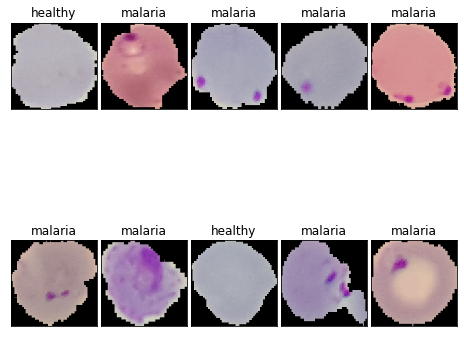

In [195]:
# visualizing few images 
plt.figure(1 , figsize = (8 , 8))
n = 0 
for i in range(10):
    n += 1 
    plt.subplot(2 , 5 ,n )
    plt.subplots_adjust(hspace = 0.0005 , wspace = 0.05)
    plt.imshow(x_train[i])
    plt.title('{}'.format(y_train[i]))
    plt.xticks([]) , plt.yticks([])

In [180]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
Y_train = le.transform(y_train)


print(y_train[:6], Y_train[:6])


['healthy' 'malaria' 'malaria' 'malaria' 'malaria' 'malaria'] [0 1 1 1 1 1]


In [182]:
BATCH_SIZE = 64
NUM_CLASSES = 2
EPOCHS = 25
INPUT_SHAPE = (125, 125, 3)



#input layer
inp = tf.keras.layers.Input(shape=INPUT_SHAPE) 
#convolution layer
conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same')(inp)
#max pooling
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3),activation='relu', padding='same')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
#flatten layer
flat = tf.keras.layers.Flatten()(pool3)
#hidden layer
hidden1 = tf.keras.layers.Dense(512, activation='relu')(flat)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 125, 125, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 128)       0   

In [183]:
Cnn = model.fit(x=x_train, y=Y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1)

Train on 19290 samples
Epoch 1/25
19290/19290 [==============================] - 936s 49ms/sample - loss: 0.3499 - accuracy: 0.8422
Epoch 2/25
19290/19290 [==============================] - 1001s 52ms/sample - loss: 0.1548 - accuracy: 0.9512
Epoch 3/25
19290/19290 [==============================] - 1544s 80ms/sample - loss: 0.1298 - accuracy: 0.9590
Epoch 4/25
19290/19290 [==============================] - 1189s 62ms/sample - loss: 0.1155 - accuracy: 0.9614
Epoch 5/25
19290/19290 [==============================] - 1251s 65ms/sample - loss: 0.0967 - accuracy: 0.9671
Epoch 6/25
19290/19290 [==============================] - 962s 50ms/sample - loss: 0.0850 - accuracy: 0.9718
Epoch 7/25
19290/19290 [==============================] - 1026s 53ms/sample - loss: 0.0652 - accuracy: 0.9766
Epoch 8/25
19290/19290 [==============================] - 1043s 54ms/sample - loss: 0.0475 - accuracy: 0.9847
Epoch 9/25
19290/19290 [==============================] - 1375s 71ms/sample - loss: 0.0333 - accura

In [184]:
x_test=pixelconv(X_test) #resizing the test data

In [196]:
predicted=model.predict(x_test, batch_size=512) 

In [197]:
pred_labels = le.inverse_transform([1 if pred > 0.5 else 0 for pred in predicted.ravel()])

In [198]:
#pred_labels

In [199]:
classification_report(y_test, pred_labels) #classification report

              precision    recall  f1-score   support

     healthy       0.94      0.97      0.96      4122
     malaria       0.97      0.94      0.95      4146

    accuracy                           0.96      8268
   macro avg       0.96      0.96      0.96      8268
weighted avg       0.96      0.96      0.96      8268



In [ ]:
confusion_matrix(y_test, pred_labels) #confusion matrix